In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [100]:
# Loading the dataset
data = pd.read_excel("/Users/ashutoshshanker/Downloads/Airbnb_V1_clean.xlsx")

In [101]:
# First 5 rows of the dataset
data.head(5)

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.83,0.24,...,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,2,0.37
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,0.94,0.96,...,349,89.0,8.0,9.0,9.0,9.0,9.0,9.0,1,4.82
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,1.00,...,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1,0.36
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2009-02-03,"New York, New York, United States",within a few hours,1.00,NaN,...,1,97.0,10.0,10.0,10.0,10.0,8.0,10.0,1,0.01
4,5178,Large Furnished Room Near B'wayã€€,Please donâ€™t expect the luxury here just a b...,8967,Shunichi,2009-03-03,"New York, New York, United States",within a few hours,1.00,1.00,...,473,84.0,9.0,7.0,9.0,9.0,10.0,9.0,1,3.42


In [102]:
# Get the number of rows and columns 
rows = len(data.axes[0]) 
cols = len(data.axes[1]) 
  
# Print the number of rows and columns 
print("Number of Rows: " + str(rows)) 
print("Number of Columns: " + str(cols)) 

Number of Rows: 45756
Number of Columns: 40


In [103]:
# Statistical Data Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45756.0,2.309535e+07,1.382572e+07,2595.00000,1.061546e+07,2.224709e+07,3.593987e+07,4.533040e+07
host_id,45756.0,8.437272e+07,9.920451e+07,2438.00000,9.250917e+06,3.726838e+07,1.359344e+08,3.665571e+08
host_response_rate,21908.0,8.729870e-01,2.599574e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,29228.0,8.048460e-01,2.771249e-01,0.00000,7.200000e-01,9.400000e-01,1.000000e+00,1.000000e+00
latitude,45756.0,4.072963e+01,5.502481e-02,40.50868,4.069003e+01,4.072455e+01,4.076316e+01,4.091214e+01
longitude,45756.0,-7.395075e+01,4.777557e-02,-74.23986,-7.398315e+01,-7.395539e+01,-7.393399e+01,-7.371299e+01
accommodates,45756.0,2.773429e+00,1.818494e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,41349.0,1.292945e+00,6.837461e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01
beds,45251.0,1.511083e+00,1.100529e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01
price,45756.0,1.495575e+02,3.153679e+02,0.00000,6.500000e+01,1.000000e+02,1.600000e+02,1.000000e+04


In [104]:
# Count and Percentage of Missing values
percentage_missing_data = pd.DataFrame([data.isnull().sum(), data.isnull().sum() * 100.0/data.shape[0]]).T
percentage_missing_data.columns = ['No_of_Missing_Data', 'Percentage_of_Missing_data']
percentage_missing_data

,No_of_Missing_Data,Percentage_of_Missing_data
id,0.0,0.000000
name,21.0,0.045896
description,1349.0,2.948247
host_id,0.0,0.000000
host_name,15.0,0.032783
host_since,14.0,0.030597
host_location,139.0,0.303785
host_response_time,23848.0,52.119941
host_response_rate,23848.0,52.119941
host_acceptance_rate,16528.0,36.122039


In [105]:
# Attribute having the missing data
percentage_missing_data_only = percentage_missing_data[percentage_missing_data['No_of_Missing_Data'] != 0.0]
percentage_missing_data_only

,No_of_Missing_Data,Percentage_of_Missing_data
name,21.0,0.045896
description,1349.0,2.948247
host_name,15.0,0.032783
host_since,14.0,0.030597
host_location,139.0,0.303785
host_response_time,23848.0,52.119941
host_response_rate,23848.0,52.119941
host_acceptance_rate,16528.0,36.122039
host_is_superhost,14.0,0.030597
host_has_profile_pic,14.0,0.030597


In [106]:
data.host_response_rate.unique().sort()

In [107]:
# Count of records for each neighbourhood
data.neighbourhood_group_cleansed.value_counts()

Manhattan        20236
Brooklyn         18263
Queens            5746
Bronx             1185
Staten Island      326
Name: neighbourhood_group_cleansed, dtype: int64

In [108]:
# Top 20 Neighbourhoods with maximum number of reviews
top_reviewed_listings=data.nlargest(20,'number_of_reviews')
top_reviewed_listings.neighbourhood_cleansed

31409       Theater District
9637                 Jamaica
11033                Jamaica
16526          East Elmhurst
1570         Lower East Side
15629    Springfield Gardens
6525           East Elmhurst
5790           East Elmhurst
12721                Gowanus
18091          East Elmhurst
17390          East Elmhurst
982             East Village
1049                Flushing
5075           East Elmhurst
1732            East Village
210                  Astoria
912                  Jamaica
4285            Williamsburg
2015            Williamsburg
4             Hell's Kitchen
Name: neighbourhood_cleansed, dtype: object

In [109]:
data.cov()

,id,host_id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.911507e+14,7.975709e+14,-1.003498e+05,5.873287e+05,3092.224013,70197.323522,9.144784e+05,3.670470e+05,5.143125e+05,-4.123893e+06,...,-1.859776e+08,-3.367009e+06,-7.742829e+05,9.121797e+04,-8.218678e+05,-1.017824e+06,2.794280e+05,-3.040676e+05,3.830705e+07,2.079088e+06
host_id,7.975709e+14,9.841534e+15,-1.636181e+06,5.916138e+06,173074.215174,703502.987810,8.106876e+06,2.061761e+06,6.486796e+06,3.806454e+08,...,-5.443341e+08,-1.038876e+08,-1.164334e+07,-4.328920e+06,-8.960292e+06,-1.145483e+07,-4.009193e+06,-9.814825e+06,1.576951e+08,2.140220e+07
host_response_rate,-1.003498e+05,-1.636181e+06,6.757785e-02,1.578941e-02,-0.000270,0.000333,1.130079e-02,3.395821e-03,1.012722e-02,-1.907252e+00,...,1.273443e+00,1.993855e-01,2.188611e-02,2.386033e-02,1.591705e-02,1.985031e-02,1.028643e-02,1.790888e-02,7.941042e-01,3.995901e-02
host_acceptance_rate,5.873287e+05,5.916138e+06,1.578941e-02,7.679822e-02,0.000221,0.000954,3.663879e-02,3.562292e-03,1.933741e-02,-2.377966e-01,...,2.549229e+00,-7.382860e-02,-4.137798e-03,8.495342e-03,-3.181193e-03,-6.604343e-03,-1.034372e-03,-4.439101e-03,5.884276e-01,1.018699e-01
latitude,3.092224e+03,1.730742e+05,-2.696922e-04,2.208439e-04,0.003028,0.000197,-4.687568e-03,-2.933619e-03,-3.036680e-03,4.031503e-01,...,-7.164875e-02,-1.315033e-02,-1.681784e-03,-1.329839e-03,-1.175746e-03,-1.030069e-03,1.251594e-03,-1.759636e-03,6.773436e-02,-2.603575e-03
longitude,7.019732e+04,7.035030e+05,3.333507e-04,9.536648e-04,0.000197,0.002283,-6.858328e-04,-4.492064e-04,9.140180e-04,-1.519118e+00,...,1.520470e-01,-1.087201e-02,-5.882977e-04,7.086783e-04,-2.622032e-04,-9.744410e-04,-6.087007e-03,2.467655e-04,-5.541024e-02,8.991612e-03
accommodates,9.144784e+05,8.106876e+06,1.130079e-02,3.663879e-02,-0.004688,-0.000686,3.306920e+00,9.204463e-01,1.455269e+00,1.430970e+02,...,6.544956e+00,-2.412858e-02,-1.715864e-02,7.264251e-02,5.040714e-03,-1.468510e-02,-1.850976e-02,-4.306766e-02,-1.413021e+00,2.593049e-01
bedrooms,3.670470e+05,2.061761e+06,3.395821e-03,3.562292e-03,-0.002934,-0.000449,9.204463e-01,4.675088e-01,5.598538e-01,4.843605e+01,...,2.583487e-01,9.828611e-02,-3.011374e-05,2.633484e-02,4.917674e-03,9.801973e-05,-7.662331e-04,-1.918280e-03,-3.287800e-01,2.842542e-02
beds,5.143125e+05,6.486796e+06,1.012722e-02,1.933741e-02,-0.003037,0.000914,1.455269e+00,5.598538e-01,1.211164e+00,5.985074e+01,...,3.561880e+00,-8.367611e-02,-1.598456e-02,2.623388e-02,6.294553e-04,-1.186136e-02,-1.820101e-02,-1.833507e-02,-9.242881e-01,1.383921e-01
price,-4.123893e+06,3.806454e+08,-1.907252e+00,-2.377966e-01,0.403150,-1.519118,1.430970e+02,4.843605e+01,5.985074e+01,9.945693e+04,...,-5.401288e+02,4.417833e+01,4.319626e-01,9.318885e+00,-2.504525e+00,-7.130328e-01,7.894972e+00,-3.826716e+00,5.471559e+01,-1.036605e+01


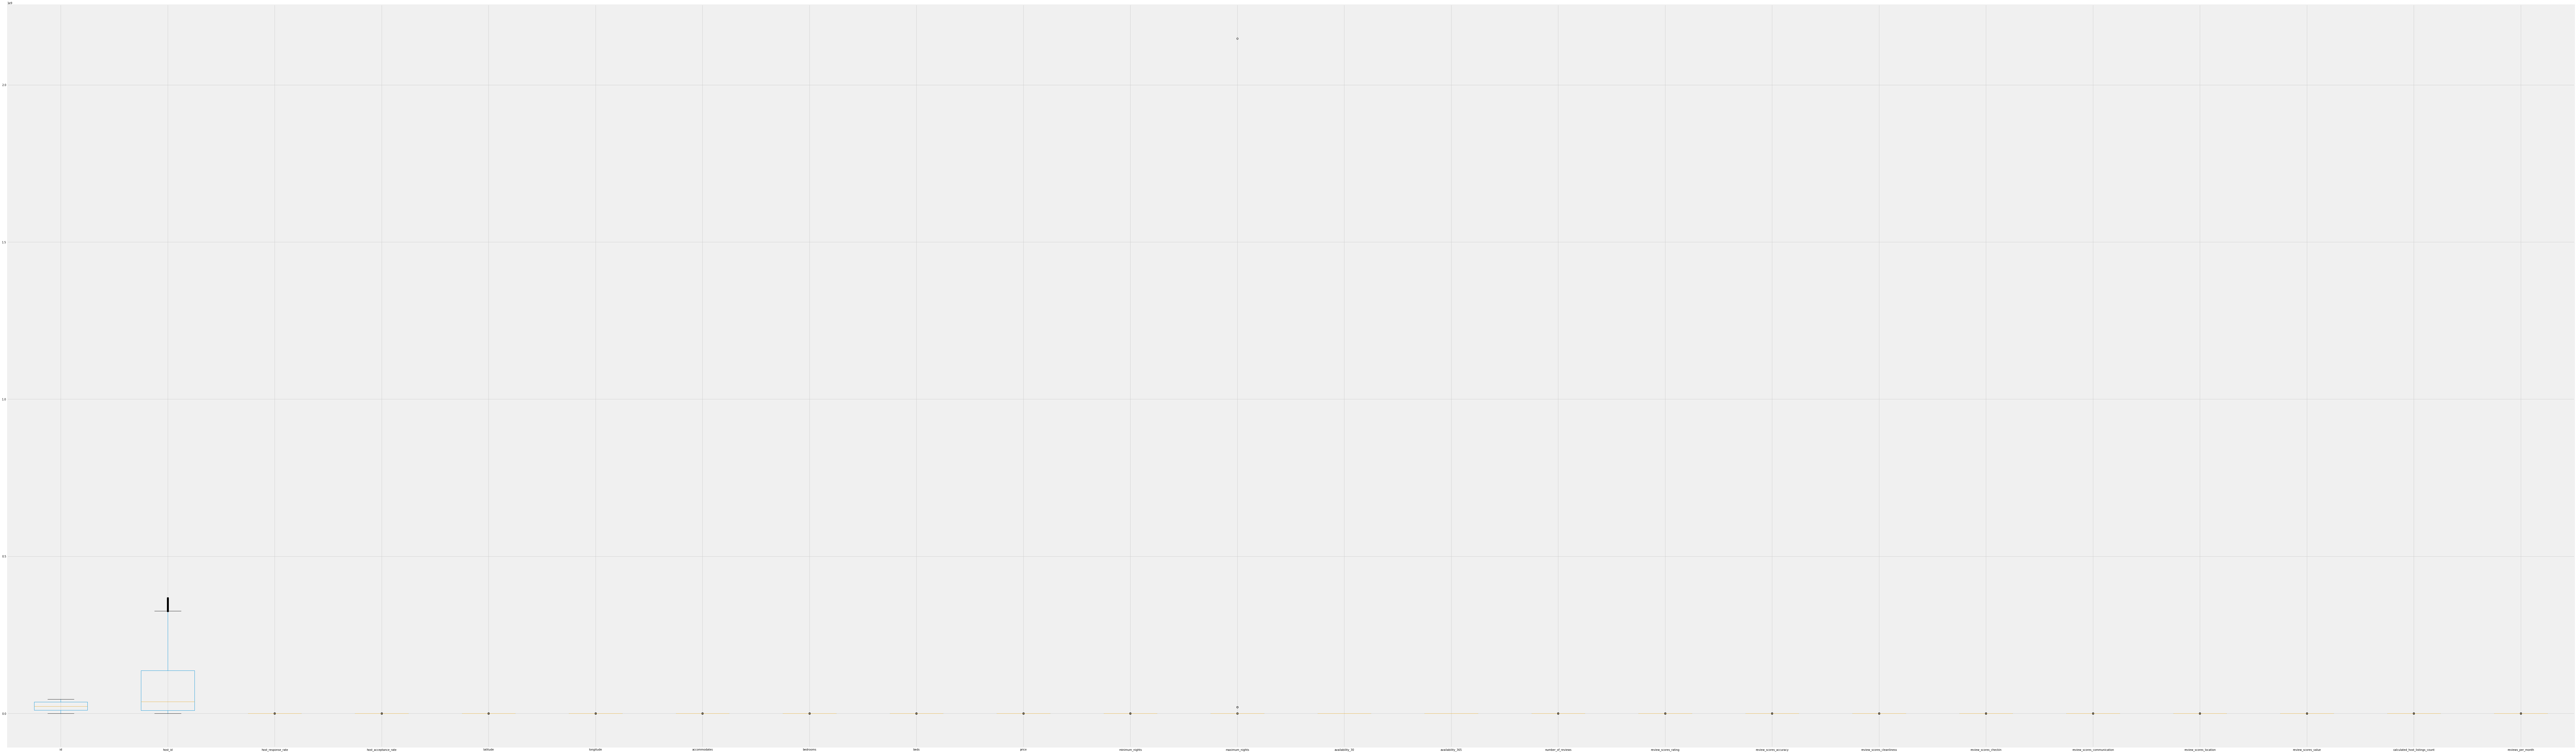

In [110]:
# Boxplot for each attribute
%matplotlib inline

data.boxplot(figsize=(150,50))

In [111]:
# Checking any duplicate in the dataset
data.duplicated().sum()

0

In [112]:
data['bedrooms'] = data['bedrooms'].replace(np.nan, 0)
data['beds'] = data['beds'].replace(np.nan, 0)

In [113]:
bins_accomodate = [0, 1, 2, 3, 4, 5, 6, np.inf]
labels =[1,2,3,4,5,6,7]
data['binned_accomodate'] = pd.cut(data['accommodates'], bins_accomodate, labels=labels)

In [114]:
data[['accommodates', 'binned_accomodate']] 

,accommodates,binned_accomodate
0,2,2
1,3,3
2,2,2
3,4,4
4,2,2
...,...,...
45751,1,1
45752,1,1
45753,1,1
45754,1,1


In [115]:
data['binned_accomodate'].unique() 

[2, 3, 4, 1, 5, 6, 7, NaN]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [116]:
data['binned_accomodate'].value_counts()

2    21283
1     7517
4     6839
3     4805
6     2075
5     1716
7     1515
Name: binned_accomodate, dtype: int64

In [117]:
data['bedrooms'].value_counts()

1.0     32766
2.0      6061
0.0      4407
3.0      1867
4.0       466
5.0       123
6.0        32
7.0        12
8.0        11
10.0        3
9.0         3
14.0        2
13.0        1
21.0        1
11.0        1
Name: bedrooms, dtype: int64

In [118]:
bins_bedrooms = [0, 1, 2, 3, 4, 5,np.inf]
labels =[1,2,3,4,5,6]
data['binned_bedrooms'] = pd.cut(data['bedrooms'], bins_bedrooms, labels=labels, include_lowest= True)

In [119]:
data['binned_bedrooms'].value_counts()

1    37173
2     6061
3     1867
4      466
5      123
6       66
Name: binned_bedrooms, dtype: int64

In [120]:
data[['bedrooms', 'binned_bedrooms']] 

,bedrooms,binned_bedrooms
0,0.0,1
1,1.0,1
2,1.0,1
3,2.0,2
4,1.0,1
...,...,...
45751,1.0,1
45752,1.0,1
45753,1.0,1
45754,1.0,1


Word Cloud showing the most commonly used amenities

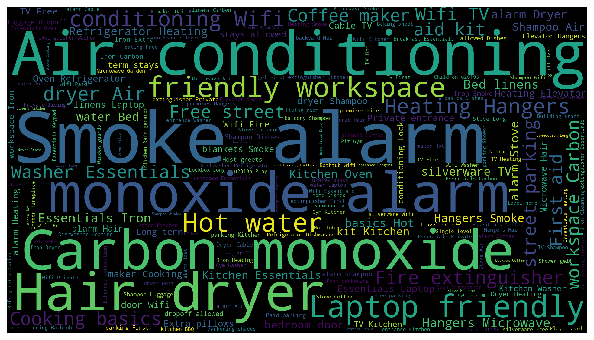

In [121]:
# Plotting the word cloud
plt.subplots(figsize=(10,6))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.amenities))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('amenities.png')
plt.show()

In [122]:
bins_beds = [0,1, 2, 3, 4, np.inf]
labels =[1,2,3,4,5]
data['binned_beds'] = pd.cut(data['beds'], bins_beds, labels=labels, include_lowest= True)

In [123]:
data[['beds', 'binned_beds']] 

,beds,binned_beds
0,1.0,1
1,3.0,3
2,1.0,1
3,2.0,2
4,1.0,1
...,...,...
45751,1.0,1
45752,1.0,1
45753,1.0,1
45754,1.0,1


In [124]:
data['binned_beds'].value_counts()

1    30863
2     9385
3     3199
4     1374
5      935
Name: binned_beds, dtype: int64

In [125]:
labels_price = ['0-50', '51-100', '101-150', '151-200','201-250','251-300','300 above']
bins_price = [0, 50.00, 100.00, 150.00, 200.00, 250.00, 300.00,np.inf]
data['binned_price'] = pd.cut(data['price'], bins=bins_price, labels=labels_price, include_lowest= True)

In [126]:
data[['price', 'binned_price']] 

,price,binned_price
0,175.0,151-200
1,76.0,51-100
2,60.0,51-100
3,175.0,151-200
4,79.0,51-100
...,...,...
45751,53.0,51-100
45752,79.0,51-100
45753,70.0,51-100
45754,59.0,51-100


In [127]:
data['binned_price'].value_counts()

51-100       16557
101-150       9410
0-50          7408
151-200       5443
300 above     2889
201-250       2549
251-300       1500
Name: binned_price, dtype: int64

Replacing nulls will median

In [128]:
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].median())
data['review_scores_accuracy'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_cleanliness'] = data['review_scores_cleanliness'].fillna(data['review_scores_cleanliness'].median())
data['review_scores_checkin'] = data['review_scores_checkin'].fillna(data['review_scores_checkin'].median())
data['review_scores_communication'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_location'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_value'] = data['review_scores_value'].fillna(data['review_scores_value'].median())

In [129]:
host_verifications_count = []
for i in data["host_verifications"].items():
    host_verifications_count.append(i[1].count(',')+1)

data["host_verifications_count"] = host_verifications_count
    


In [130]:
amenities_count = []
for i in data["amenities"].items():
    amenities_count.append(i[1].count(',')+1)

data["amenities_count"] = amenities_count
    

In [131]:
data["amenities_count"].unique()

array([31, 35,  4, 10, 18, 16, 25, 24, 23, 27, 14, 36,  7,  9, 17, 21, 28,
       11, 26, 19,  5, 20,  8, 34, 42, 39, 12, 33, 13, 41, 37, 32, 30, 22,
       29,  3, 15,  6, 45, 38,  1, 40, 44, 43,  2, 47, 49, 46, 50, 51, 52,
       48, 66, 53, 60, 62, 55, 56])

In [132]:
data["host_verifications_count"].unique()

array([ 9,  6,  8,  3,  4,  7,  5,  1, 10,  2, 11, 12, 13])

In [133]:
data["host_verifications_count"]

0        9
1        6
2        8
3        3
4        4
        ..
45751    7
45752    6
45753    7
45754    7
45755    5
Name: host_verifications_count, Length: 45756, dtype: int64

In [134]:
labels_host_verifications_count = ['0-4','5-8','9-12','13 above']
bins_host_verifications_count = [0,4,8,12,np.inf]
data['binned_host_verifications_count'] = pd.cut(data['host_verifications_count'], bins_host_verifications_count, labels=labels_host_verifications_count, include_lowest= True)


In [135]:
data['binned_host_verifications_count'].value_counts()

5-8         27911
0-4         15316
9-12         2528
13 above        1
Name: binned_host_verifications_count, dtype: int64

In [136]:
labels_amenities_count = ['0-10','11-20','21-30','31-40','41-50','51-60','60 above']
bins_amenities_count = [0,10,20,30,40,50,60,np.inf]
data['binned_amenities_count'] = pd.cut(data['amenities_count'], bins_amenities_count, labels=labels_amenities_count, include_lowest= True)


In [137]:
data['binned_amenities_count'].value_counts()

11-20       19388
21-30       13184
0-10         8118
31-40        4676
41-50         377
51-60          11
60 above        2
Name: binned_amenities_count, dtype: int64

In [138]:
data[['bathrooms_count','bathrooms_type']] = pd.DataFrame([x.split(' ') for x in data['bathrooms_text'].tolist()])

In [139]:
data['bathrooms_count'] = data['bathrooms_count'].replace(np.nan, 0)
data['bathrooms_count'] = data['bathrooms_count'].replace('', 0)

In [140]:
data['bathrooms_type'] = data['bathrooms_type'].replace('', 0)

In [141]:
data["bathrooms_type"].unique()

array(['bath', 0, 'baths', 'shared', 'private', 'Shared', 'Private'],
      dtype=object)

In [142]:
data["bathrooms_count"].unique()

array(['1', 0, '1.5', '0.5', '2', '3.5', '3', '2.5', '0', '5', '4.5',
       '5.5', '4', '15.5', '6', '8', '6.5', '7.5', '7'], dtype=object)

In [143]:
data["bathrooms_text"].unique()

array(['1 bath', ' ', '1.5 baths', '1 shared', '1 private', '1.5 shared',
       '0.5 Shared', '2 baths', '3.5 baths', '3 baths', '0.5 Private',
       '2 shared', '2.5 baths', '0 shared', '0 baths', '5 baths',
       '4.5 baths', '5.5 baths', '2.5 shared', '4 baths', '15.5 baths',
       '6 baths', '3 shared', '8 shared', '4 shared', '4.5 shared',
       '3.5 shared', '6 shared', '6.5 shared', '6.5 baths', '5 shared',
       '7.5 baths', '8 baths', '7 baths'], dtype=object)

In [144]:
data["bathrooms_count"] = data.bathrooms_count.astype(float)

In [145]:
data["bathrooms_count"].unique()

array([ 1. ,  0. ,  1.5,  0.5,  2. ,  3.5,  3. ,  2.5,  5. ,  4.5,  5.5,
        4. , 15.5,  6. ,  8. ,  6.5,  7.5,  7. ])

In [146]:
value_dict_bathrooms_type  = {'bath':'Private','private':'Private','Private':'Private','baths':'Shared','shared':'Shared','Shared':'Shared',0:'Shared'}
data["binned_bathrooms_type"] = data["bathrooms_type"].replace(value_dict_bathrooms_type)

In [147]:
data[["bathrooms_type","binned_bathrooms_type"]]

,bathrooms_type,binned_bathrooms_type
0,bath,Private
1,bath,Private
2,0,Shared
3,baths,Shared
4,bath,Private
...,...,...
45751,shared,Shared
45752,baths,Shared
45753,shared,Shared
45754,shared,Shared


In [148]:
labels_bathrooms_count = ['0-1', '1.5-2', '2.5-3', '3.5-4','4 above']
bins_bathrooms_count = [0, 1.0, 2.0, 3.0, 4.0, np.inf]
data['binned_bathrooms_count'] = pd.cut(data['bathrooms_count'], bins=bins_bathrooms_count, labels=labels_bathrooms_count, include_lowest= True)

In [149]:
data[['bathrooms_count','binned_bathrooms_count']]

,bathrooms_count,binned_bathrooms_count
0,1.0,0-1
1,1.0,0-1
2,0.0,0-1
3,1.5,1.5-2
4,1.0,0-1
...,...,...
45751,1.5,1.5-2
45752,2.0,1.5-2
45753,2.0,1.5-2
45754,1.0,0-1


Count of top 25 most occured amenities

In [150]:
t_amenities = []
for amenities in data.amenities:
    t_amenities.append(amenities)
    
def amenities_split(amenities):
    split_n = str(amenities).split(',')
    return split_n

t_amenities_count = []
for i in t_amenities:
    for word in amenities_split(i):
        word = word.lower()
        t_amenities_count.append(word)

In [151]:
from collections import Counter
#top 25 used words by host to name their listing
Top_25_words=Counter(t_amenities_count).most_common()
Top_25_words=Top_25_words[0:25]

In [152]:
Top_25_words

[(' "wifi"', 44224),
 (' "heating"', 40704),
 (' "kitchen"', 39944),
 (' "air conditioning"', 38752),
 (' "smoke alarm"', 38529),
 (' "essentials"]', 34768),
 (' "hangers"', 33751),
 (' "tv"', 31378),
 (' "shampoo"', 29799),
 (' "hair dryer"', 29199),
 (' "carbon monoxide alarm"', 28371),
 (' "hot water"', 25225),
 ('["iron"', 19444),
 (' "dishes and silverware"', 19281),
 (' "refrigerator"', 18272),
 (' "washer"', 17986),
 (' "dryer"', 17295),
 (' "fire extinguisher"', 17189),
 (' "microwave"', 16780),
 (' "cooking basics"', 16686),
 (' "stove"', 16575),
 (' "free street parking"', 15955),
 (' "first aid kit"', 15332),
 (' "coffee maker"', 15310),
 (' "laptop-friendly workspace"', 14922)]

In [153]:
#now let's put our findings in dataframe for further visualizations
sub_words = pd.DataFrame(Top_25_words)
sub_words.rename(columns = {0:'Amenities',1:'Count'}, inplace=True)

[Text(0, 0, ' "wifi"'),
 Text(0, 0, ' "heating"'),
 Text(0, 0, ' "kitchen"'),
 Text(0, 0, ' "air conditioning"'),
 Text(0, 0, ' "smoke alarm"'),
 Text(0, 0, ' "essentials"]'),
 Text(0, 0, ' "hangers"'),
 Text(0, 0, ' "tv"'),
 Text(0, 0, ' "shampoo"'),
 Text(0, 0, ' "hair dryer"'),
 Text(0, 0, ' "carbon monoxide alarm"'),
 Text(0, 0, ' "hot water"'),
 Text(0, 0, '["iron"'),
 Text(0, 0, ' "dishes and silverware"'),
 Text(0, 0, ' "refrigerator"'),
 Text(0, 0, ' "washer"'),
 Text(0, 0, ' "dryer"'),
 Text(0, 0, ' "fire extinguisher"'),
 Text(0, 0, ' "microwave"'),
 Text(0, 0, ' "cooking basics"'),
 Text(0, 0, ' "stove"'),
 Text(0, 0, ' "free street parking"'),
 Text(0, 0, ' "first aid kit"'),
 Text(0, 0, ' "coffee maker"'),
 Text(0, 0, ' "laptop-friendly workspace"')]

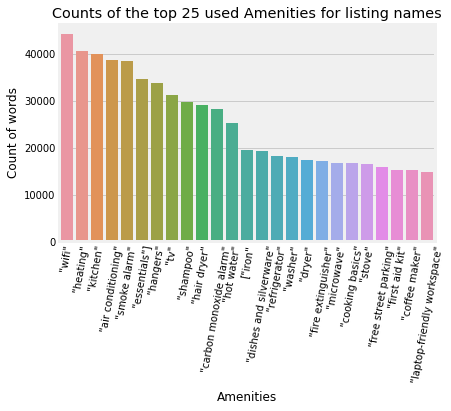

In [154]:
viz_1=sns.barplot(x='Amenities', y='Count', data=sub_words)
viz_1.set_title('Counts of the top 25 used Amenities for listing names')
viz_1.set_ylabel('Count of words')
viz_1.set_xlabel('Amenities')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

Barplot showing Room Type vs Price

Text(0.5, 1.0, 'Room Type vs Price')

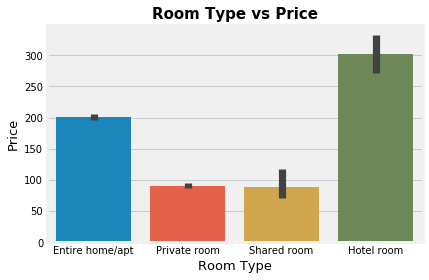

In [155]:
plt.figure(figsize=(6,4))
sns.barplot(x='room_type', y='price', data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Bar graph showing the price of a listing in different neighbourhoods

Text(0.5, 1.0, 'Neighbourhood Group vs Price')

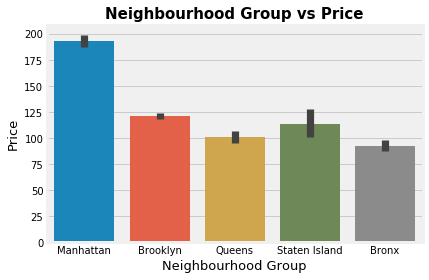

In [156]:
plt.figure(figsize=(6,4))
sns.barplot(x='neighbourhood_group_cleansed', y='price', data=data)

plt.xlabel("Neighbourhood Group", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood Group vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

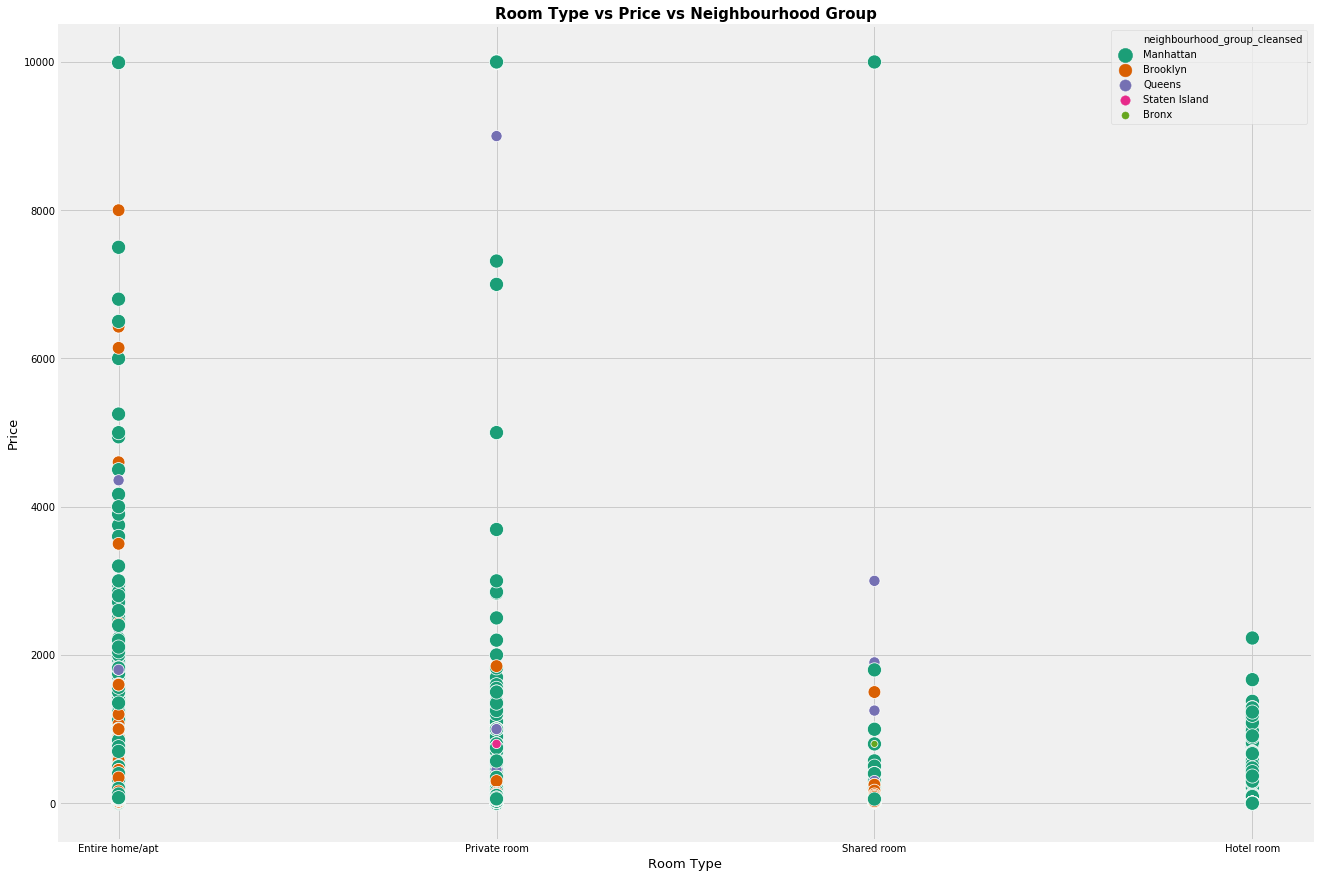

In [157]:
# Scatterplot showing the Room Type vs Price vs Neighbourhood Group
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group_cleansed", size="neighbourhood_group_cleansed",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Manhatten and Brooklyn have the highest share of hotels.

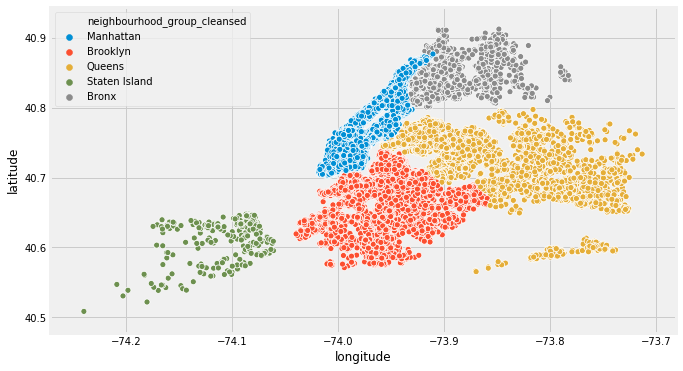

In [158]:
# Distribution of airbnbs across the neighborhood of NYC.
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group_cleansed)
plt.ioff()


Area wise distribution of price shows that Manhattan has expensive and Staten Island has low priced rooms

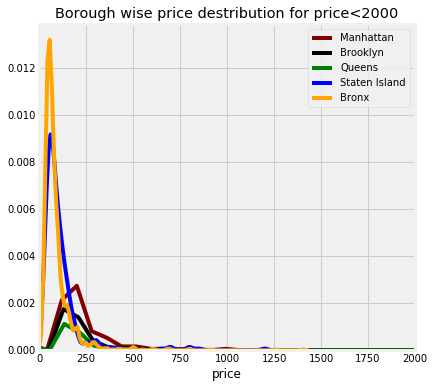

In [159]:
# Borough wise price destribution for price
plt.figure(figsize=(6,6))
sns.distplot(data[data.neighbourhood_group_cleansed=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group_cleansed=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group_cleansed=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group_cleansed=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group_cleansed=='Bronx'].price,color='orange',hist=False,label='Bronx')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

Box plot showing the neighbourhood_group price distribution

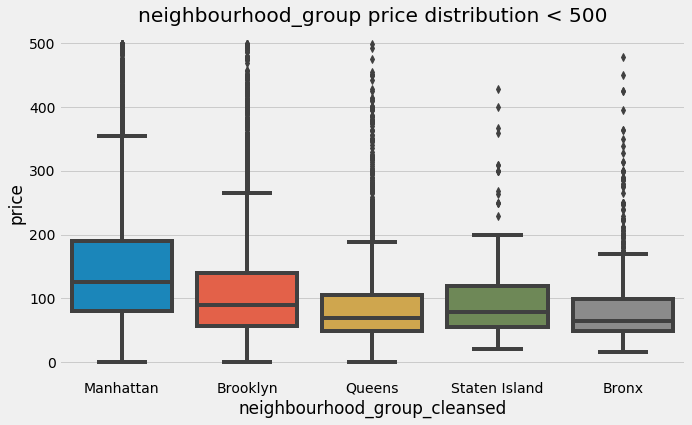

In [160]:
plt.style.use('fivethirtyeight')
ng = data[data.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group_cleansed' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

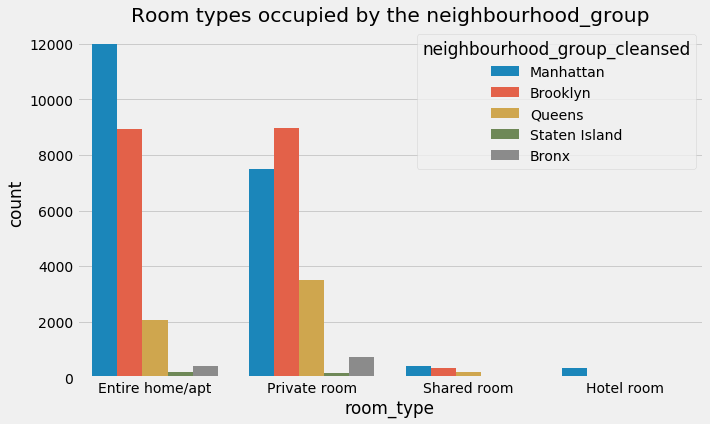

In [161]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

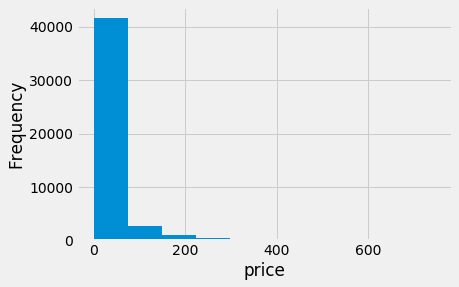

In [162]:
# Price vs number_of_reviews
plt.figure(figsize=(6,4))
data['number_of_reviews'].plot(kind='hist')
plt.xlabel("price")
plt.ioff()
plt.show()

Count of amenities have do not affect on price of accommodation

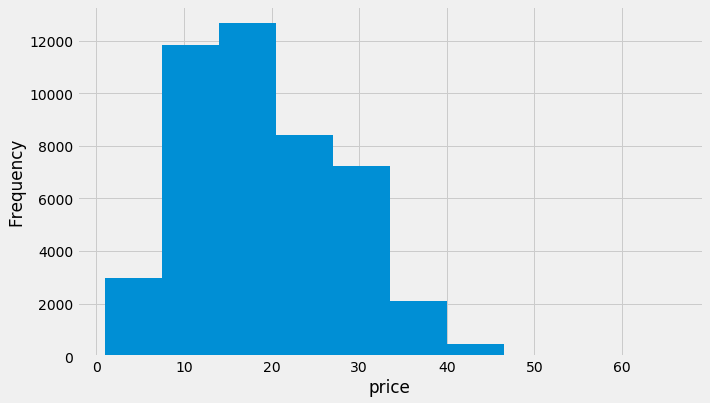

In [163]:
# Checking how count of amenities affect the price
plt.figure(figsize=(10,6))
data['amenities_count'].plot(kind='hist')
plt.xlabel("price")
plt.ioff()
plt.show()

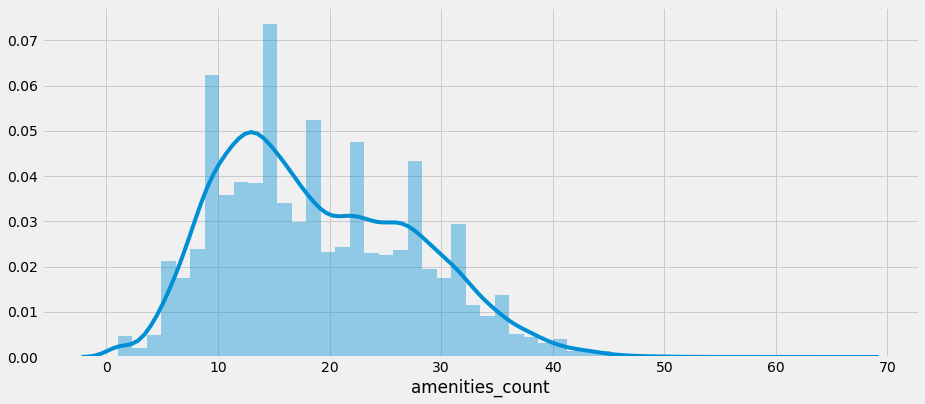

In [164]:
# Plot of amenities distribution
plt.figure(figsize=(14,6))
sns.distplot(data['amenities_count'])
plt.show()

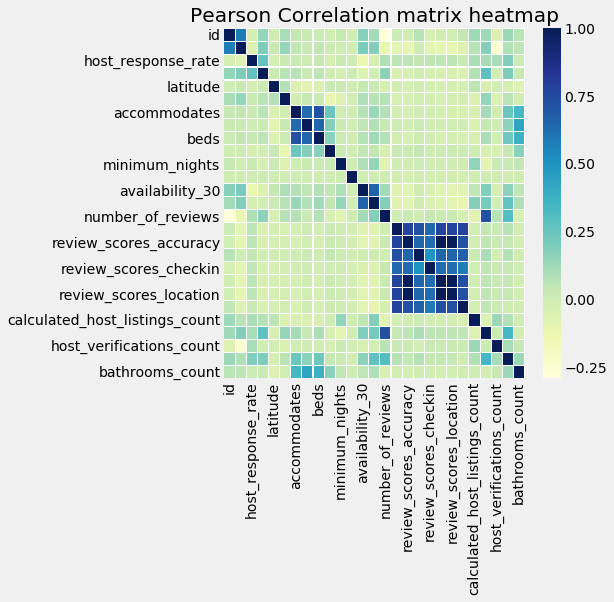

In [165]:
# Correlation matrix heatmap

import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6));
sns.heatmap(data.corr(), ax=ax, annot=False, linewidths=.1, cmap = "YlGnBu");
plt.title('Pearson Correlation matrix heatmap');

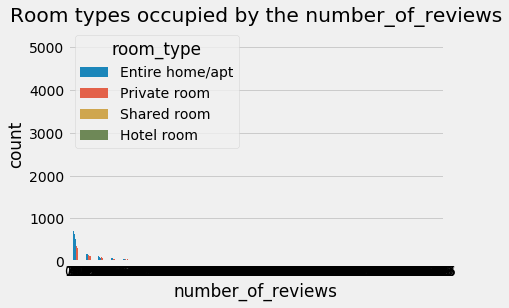

In [166]:
# Checking the dependency between the Room types occupied and the number_of_reviews
plt.figure(figsize=(6,4))
sns.countplot(x = 'number_of_reviews',hue = "room_type",data = data)
plt.title("Room types occupied by the number_of_reviews")
plt.show()

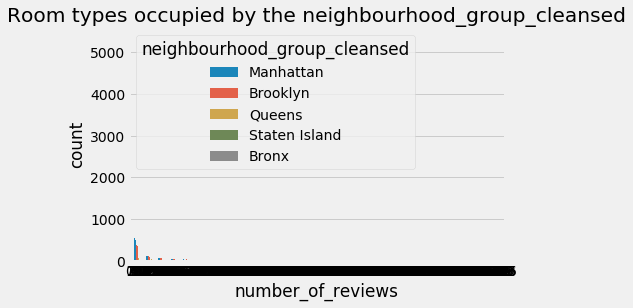

In [167]:
# Checking the dependency between the neighborhood and the number_of_reviews
plt.figure(figsize=(6,4))
sns.countplot(x = 'number_of_reviews',hue = "neighbourhood_group_cleansed",data = data)
plt.title("Room types occupied by the neighbourhood_group_cleansed")
plt.show()